In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importing data
df = pd.read_csv('Crash_Data.csv',low_memory=False)
df.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


In [3]:
df.shape

(52843, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

# Data Cleaning

In [5]:
# columns 14,15,16,17,18,19 having lot of missing values or insignificant information, thus have been removed
df_new = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,20,21,22]]
df_new.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,38,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,110,Pedestrian,Female,28,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,NaN,Passenger,Male,19,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,NaN,Driver,Male,23,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,NaN,Motorcycle rider,Male,46,40_to_64,Weekend,Night


In [6]:
# Inspecting all the heavy vehicles involvement columns
df_new.iloc[:,7:10].value_counts()

Bus Involvement  Heavy Rigid Truck Involvement  Articulated Truck Involvement
No               No                             No                               27141
                                                Yes                               3074
                 Yes                            No                                1476
Yes              No                             No                                 498
No               Yes                            Yes                                105
Yes              No                             Yes                                 22
                 Yes                            No                                  12
dtype: int64

In [7]:
# combining the bus, heavy and articulated involvement columns into single column 
# populating the null values with 0
df_new = df_new.fillna(value = 0)
# converting the boolean values of the 3 columns into 1 and 0 to perform calculation
df_new['Bus Involvement'] = df_new['Bus Involvement'].map({'Yes':1,'No':0,0:0})
df_new['Heavy Rigid Truck Involvement'] = df_new['Heavy Rigid Truck Involvement'].map({'Yes':1,'No':0,0:0})
df_new['Articulated Truck Involvement'] = df_new['Articulated Truck Involvement'].map({'Yes':1,'No':0,0:0})
# new column is 'Yes' if any of the three old columns says 'Yes'
df_new['Heavy vehicle involvement'] = df_new['Bus Involvement']+df_new['Heavy Rigid Truck Involvement']+df_new['Articulated Truck Involvement']
df_new['Heavy vehicle involvement'] = ['Yes' if i>0 else 'No' for i in df_new['Heavy vehicle involvement']]
print(df_new['Heavy vehicle involvement'].value_counts())

No     45103
Yes     7740
Name: Heavy vehicle involvement, dtype: int64


In [8]:
# replacing 0 values in time column to a hour and minute format
df_new['Time'] = df_new['Time'].replace(to_replace = 0,value='0:0')
# merging Time,month and year columns to create one date column
df_new['date'] = df_new['Year'].astype(str) + ' ' + df_new['Month'].astype(str) + ' ' + df_new['Time'].astype(str)
# converting the data type into datetime
df_new['date'] = pd.to_datetime(df_new['date'],format = '%Y %m %H:%M')
df_new['date'].head()

0   2021-09-01 00:30:00
1   2021-09-01 23:31:00
2   2021-09-01 23:00:00
3   2021-09-01 22:25:00
4   2021-09-01 05:15:00
Name: date, dtype: datetime64[ns]

In [9]:
# Replacing all the irrelavant and insignificant data to none
df_new['Speed Limit'].replace(to_replace = ['-9','5','15','25',0,'0','<40','Unspecified'],value = None,inplace=True)
# cleaning up the gender column
df_new['Gender'].replace([0,'0','Unspecified'],None,inplace=True)
# cleaning up the age group column
df_new['Age Group'].replace([0,'0'],None,inplace = True)
# cleaning up the age column
df_new['Age'].replace([-9,0],None,inplace = True)
print(df_new['Speed Limit'].value_counts())
print(df_new['Gender'].value_counts())
print(df_new['Age Group'].value_counts())

100    18248
60     13686
80      6119
110     6038
50      2903
70      2538
90      1137
40       346
75       254
130      116
20        27
10        18
30        14
Name: Speed Limit, dtype: int64
Male      37813
Female    15002
Name: Gender, dtype: int64
17_to_25       13771
40_to_64       13415
26_to_39       12364
75_or_older     5110
0_to_16         4080
65_to_74        4013
Name: Age Group, dtype: int64


In [10]:
# preparing a new dataframe with cleaned and organized data
# for the purpose of this analysis I decided to trim the data to past 30 years (1991 to 2021)
df_clean = df_new[pd.DatetimeIndex(df_new['date']).year > 1991].iloc[:,[0,18,3,4,15,16,1,11,12,13,14,18,6,10,17]]
df_clean.head()

,Crash ID,date,Year,Dayweek,Day of week,Time of day,State,Road User,Gender,Age,Age Group,date,Crash Type,Speed Limit,Heavy vehicle involvement
0,20212133,2021-09-01 00:30:00,2021,Sunday,Weekend,Night,Vic,Motorcycle rider,Male,38,26_to_39,2021-09-01 00:30:00,Single,None,No
1,20214022,2021-09-01 23:31:00,2021,Saturday,Weekend,Night,SA,Pedestrian,Female,28,26_to_39,2021-09-01 23:31:00,Multiple,110,No
2,20212096,2021-09-01 23:00:00,2021,Saturday,Weekend,Night,Vic,Passenger,Male,19,17_to_25,2021-09-01 23:00:00,Single,None,No
3,20212145,2021-09-01 22:25:00,2021,Saturday,Weekend,Night,Vic,Driver,Male,23,17_to_25,2021-09-01 22:25:00,Single,None,No
4,20212075,2021-09-01 05:15:00,2021,Saturday,Weekend,Night,Vic,Motorcycle rider,Male,46,40_to_64,2021-09-01 05:15:00,Single,None,No


# Analysis

### Trend of road deaths over past 30 years (1991 to 2021)

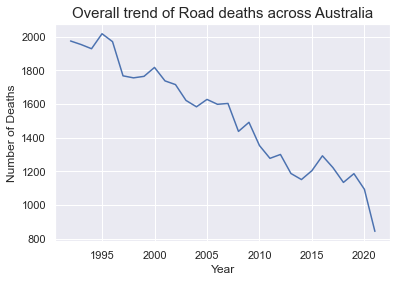

In [11]:
deathcount_df = df_clean.groupby('Year')['Crash ID'].count().reset_index()
sns.set_theme('notebook')
sns.set_style('darkgrid')
g = sns.lineplot(x='Year',y='Crash ID',data = deathcount_df)
plt.title('Overall trend of Road deaths across Australia',size=15)
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.show()

### Overall there is a great declining trend in the death count, but how does the trend look like relative to population?


In [12]:
# Importing the population data of all the states over the same 30 years
pop = pd.read_csv('Australia_population(1991 to 2021).csv').iloc[0:8]
pop

,State/territory,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NSW,5898731,5957822,5995055,6044819,6105560,6176461,6246267,6305799,6375103,...,7304244,7404032,7508353,7616168,7732858,7915100,7987300,8089526,8172505,8189266
1,Vic.,4420373,4450217,4462766,4472989,4497660,4534984,4569297,4606970,4652462,...,5651091,5772669,5894917,6022322,6173172,6385800,6459800,6594804,6661736,6664915
2,Qld,2960951,3023198,3096185,3166566,3237380,3303192,3355417,3404484,3453936,...,4568687,4652824,4719653,4777692,4845152,4965000,5012200,5095100,5194879,5221170
3,SA,1446299,1455442,1458632,1463089,1465340,1469079,1475658,1483270,1490934,...,1656725,1671488,1686945,1700668,1712843,1728100,1736400,1751693,1770790,1773243
4,WA,1636067,1658544,1678722,1704649,1736066,1768206,1798341,1826440,1853936,...,2425507,2486944,2517608,2540672,2555978,2584800,2595900,2621680,2670241,2681633
5,Tas.(d),466802,469979,471987,473499,474515,475605,474908,473430,473030,...,511724,512231,513621,515117,517514,524700,528100,534281,541506,541479
6,NT,165493,168546,171708,174908,179602,184516,189755,192905,196012,...,235915,241722,242894,244692,245678,246700,247300,245869,246561,246338
7,ACT(e),288586,294230,299114,302194,305838,309629,310533,311532,314171,...,376539,383257,388799,395813,403104,415900,420900,426709,431484,432266


In [13]:
# pivoting the population data into long format
pop_by_state = pd.melt(pop, id_vars='State/territory',
       var_name = "Year",
       value_name = "Population")
pop_by_state.head(10)

,State/territory,Year,Population
0,NSW,1991,5898731
1,Vic.,1991,4420373
2,Qld,1991,2960951
3,SA,1991,1446299
4,WA,1991,1636067
5,Tas.(d),1991,466802
6,NT,1991,165493
7,ACT(e),1991,288586
8,NSW,1992,5957822
9,Vic.,1992,4450217


In [14]:
# creating a dataframe with population with respective to each year
pop_by_year = pop_by_state.groupby(['Year'])['Population'].sum().reset_index()
pop_by_year['Year']= pop_by_year['Year'].astype('int')
pop_by_year.head()

,Year,Population
0,1991,17283302
1,1992,17477978
2,1993,17634169
3,1994,17802713
4,1995,18001961


In [15]:
# merging the death count data frame to population data
deaths_vs_pop = deathcount_df.merge(pop_by_year, on= 'Year',how='inner')
deaths_vs_pop['deaths_per_1Mil'] = deaths_vs_pop['Crash ID']/deaths_vs_pop['Population']*1000000
deaths_vs_pop.head()

,Year,Crash ID,Population,deaths_per_1Mil
0,1992,1974,17477978,112.942126
1,1993,1953,17634169,110.750895
2,1994,1928,17802713,108.298100
3,1995,2017,18001961,112.043349
4,1996,1970,18221672,108.113021


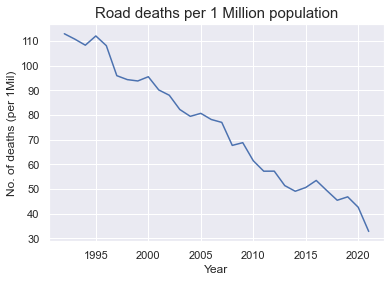

In [16]:
# Plotting the trend of overall road deaths for past 30 years
sns.set_theme('notebook')
sns.set_style('darkgrid')
g= sns.lineplot(x='Year',y='deaths_per_1Mil',data=deaths_vs_pop)
g.set_title('Road deaths per 1 Million population',size=15)
g.set_ylabel('No. of deaths (per 1Mil)')
plt.show()

### How does the trends in each state look like relative to their population?

In [17]:
# creating new dataframe with year and death count by state
counted_df_by_state = df_clean.groupby(['Year','State'])['Crash ID'].count().reset_index()
counted_df_by_state.head()

,Year,State,Crash ID
0,1992,ACT,20
1,1992,NSW,649
2,1992,NT,54
3,1992,Qld,416
4,1992,SA,165


In [18]:
# Changing the state/territory names to match with our deaths data frame.
pop_by_state.Year = pop_by_state.Year.astype('int')
pop_by_state['State/territory'].replace(['Tas.(d)','ACT(e)','Vic.'],['Tas','ACT','Vic'],inplace=True)

In [19]:
# Merging the deaths data to population
counted_df_merged = counted_df_by_state.merge(pop_by_state, left_on=['State','Year'],right_on=['State/territory','Year'], how='inner')
# creating deaths for 1mil population column.
counted_df_merged['Deaths_per_1Mil'] = counted_df_merged['Crash ID']/counted_df_merged['Population']*1000000
counted_df_merged.head()

,Year,State,Crash ID,State/territory,Population,Deaths_per_1Mil
0,1992,ACT,20,ACT,294230,67.974034
1,1992,NSW,649,NSW,5957822,108.932425
2,1992,NT,54,NT,168546,320.387313
3,1992,Qld,416,Qld,3023198,137.602631
4,1992,SA,165,SA,1455442,113.367623


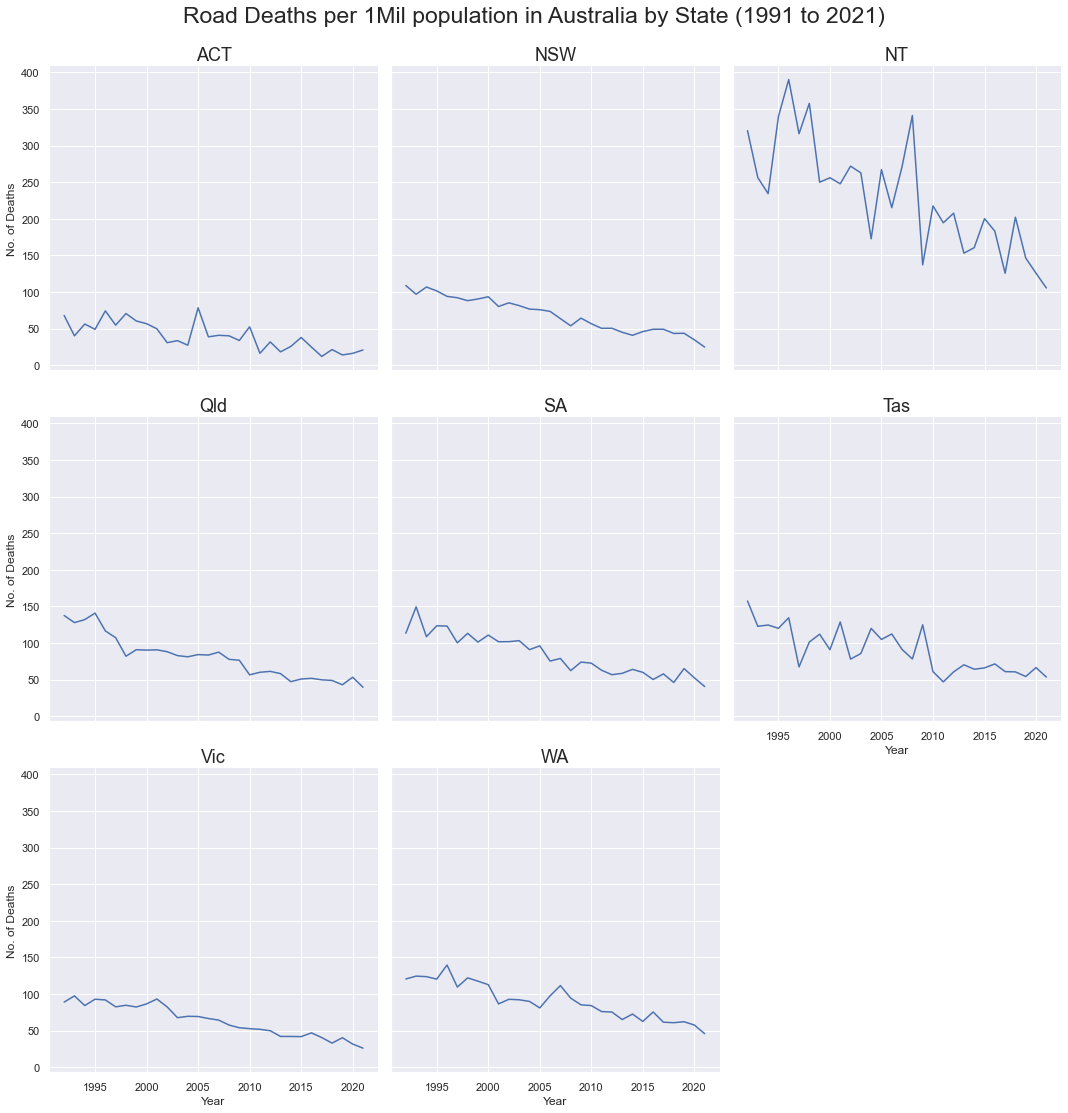

In [20]:
# plotting number of Road deaths per 1Mil people of all the states over 30 years.
sns.set_style('white')
sns.set_theme('notebook')
g= sns.relplot(x='Year',y='Deaths_per_1Mil',data = counted_df_merged, kind='line',col='State',col_wrap=3)
g.fig.suptitle('Road Deaths per 1Mil population in Australia by State (1991 to 2021)',size=23,y=1.03)
g.set_titles('{col_name}',size=18)
g.set(xlabel='Year',ylabel='No. of Deaths')
plt.show()

Northern territory has the highest death count throughout the 30 year period. 
It also has the most fluctuations in the trend,Possible reasons could be changing road rules and safety measures as the political leadership change.

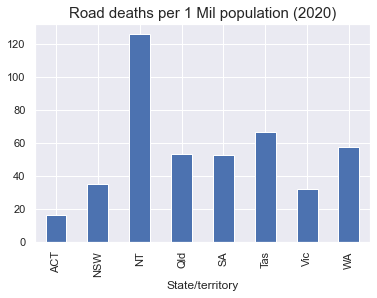

In [21]:
# Lets have a look at the death counts for the previous year 2020.
counted_df_merged[counted_df_merged['Year']==2020].groupby('State/territory')['Deaths_per_1Mil'].mean().reset_index().plot(kind='bar',x='State/territory',y='Deaths_per_1Mil',legend=False)
plt.title('Road deaths per 1 Mil population (2020)',size=15)
plt.show()

#### How much more likely a person could die on Nothern territory's roads compared to other places in Australia in 2020

In [33]:
# Avg deaths in NT for the year 2020
avg_deaths_NT = counted_df_merged[(counted_df_merged['State/territory']=='NT') & (counted_df_merged['Year']==2020)]['Deaths_per_1Mil'].mean()
# Avg deaths in elsewhere in australia for the year 2020
avg_deaths_notNT = counted_df_merged[(counted_df_merged['State/territory']!='NT') & (counted_df_merged['Year']==2020)]['Deaths_per_1Mil'].mean()
avg_deaths_NT/avg_deaths_notNT

2.815064200773026

"If you were on the Roads of Northern Territory, Australia in the year 2020, you were nearly 3 times more likely to be killed in an Accident than other Australians."

### which age group is involved in highest amount of road deaths?

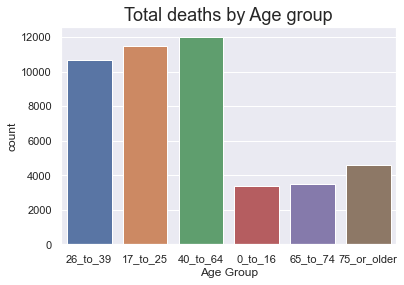

<Figure size 1080x720 with 0 Axes>

In [34]:
sns.set_theme('notebook')
g = sns.countplot(x='Age Group',data=df_clean)
g.set_title('Total deaths by Age group',size=18)
plt.figure(figsize=(15,10))
plt.show()

#### 3 age groups, 17 to 25, 26 to 39, 40 to 64 are showing significantly higher number of deaths

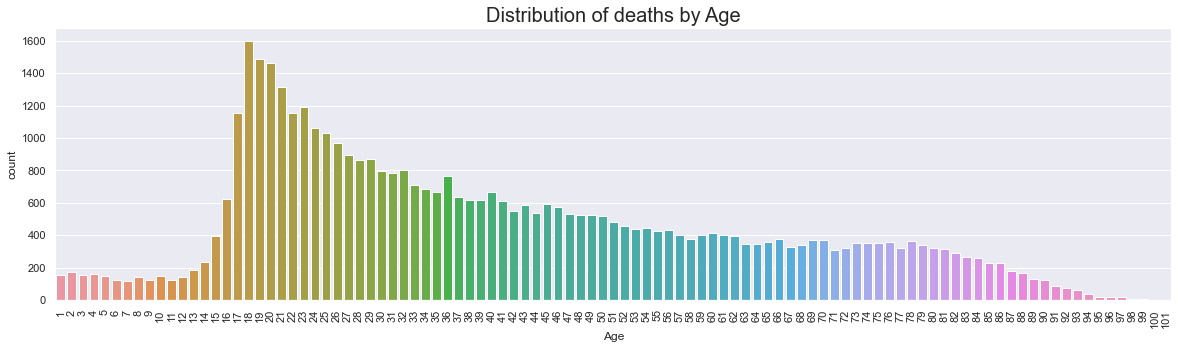

In [39]:
# let us closely inspect the ages from 16 to 64
df_sort_age = df_clean.sort_values('Age')
sns.set_theme('notebook')
sns.set_style('darkgrid')
sns.set_palette('RdBu')
g=sns.countplot(x='Age',data=df_sort_age)
g.set_title('Distribution of deaths by Age',size=20)
sns.set(rc = {'figure.figsize':(20,5)})
plt.xticks(rotation=90)
plt.show()

People that fall in the age group of 17 to 24 have higher number of deaths than the others, with 18 years olds having the highest death count.

In [ ]:
# Average number of deaths in the risky age group
risky_ages['Age'].value_counts().mean()